In [1]:
import polars as pl
benchmarks = pl.read_parquet('../data/benchmarks_nx.parquet')
factors = pl.read_parquet('../data/factors_nx.parquet')
targets = pl.read_parquet('../data/targets_nx.parquet')
benchmarks.head(), factors.head(), targets.head()

(shape: (5, 3)
 ┌──────────┬──────┬──────────────┐
 │ date     ┆ name ┆ return_value │
 │ ---      ┆ ---  ┆ ---          │
 │ i64      ┆ str  ┆ f64          │
 ╞══════════╪══════╪══════════════╡
 │ 20200102 ┆ 905  ┆ -0.002011    │
 │ 20200103 ┆ 905  ┆ 0.014292     │
 │ 20200106 ┆ 905  ┆ 0.007365     │
 │ 20200107 ┆ 905  ┆ -0.002941    │
 │ 20200108 ┆ 905  ┆ 0.008381     │
 └──────────┴──────┴──────────────┘,
 shape: (5, 4)
 ┌──────────┬──────┬─────────────┬──────────────┐
 │ date     ┆ code ┆ factor_name ┆ factor_value │
 │ ---      ┆ ---  ┆ ---         ┆ ---          │
 │ i64      ┆ i32  ┆ str         ┆ f64          │
 ╞══════════╪══════╪═════════════╪══════════════╡
 │ 20200102 ┆ 1    ┆ factor1     ┆ 0.028484     │
 │ 20200102 ┆ 2    ┆ factor1     ┆ 0.065162     │
 │ 20200102 ┆ 4    ┆ factor1     ┆ 0.018787     │
 │ 20200102 ┆ 6    ┆ factor1     ┆ 0.03666      │
 │ 20200102 ┆ 7    ┆ factor1     ┆ 0.031985     │
 └──────────┴──────┴─────────────┴──────────────┘,
 shape: (5, 4)
 ┌─────

In [2]:
import sys
sys.path.append('../')
from nebular_xplorer.utils import prepare, getReturnTable
key_name = ['date', 'code']
full_data = prepare(factors, targets)
return_table = getReturnTable(full_data, 'factor1', '1d_forward_return',benchmarks)

[  Prepare(nx)  ]2024-08-17 13:54:56 | utils.py:nebular_xplorer.utils:prepare:28 | 25256 0:00:00.757680  
 └──── INFO: 
    Nx full data prepared from 20200102 to 20201231.
    Shape: (915277, 5)
    Days: 243 
    Num of avg codes: 3766


In [49]:
from nebular_xplorer.stat import metrics, summaryMetrics, getPortStat, DDS, cal_nav
from nebular_xplorer.report import HtmlTpl
m = metrics(full_data)
summaryMetrics(m)

,IC,rankIC,IR,rankIR,begin_date,end_date
1d_forward_return,-0.0301,-0.0126,-0.4713,-0.1547,2020-01-02,2020-12-31
5d_forward_return,-0.0449,-0.0038,-0.5959,-0.0506,2020-01-02,2020-12-31


In [319]:
# return_table_ = return_table
return_table = return_table_[['G10N10', 'G10N01']]

<Figure size 640x480 with 0 Axes>

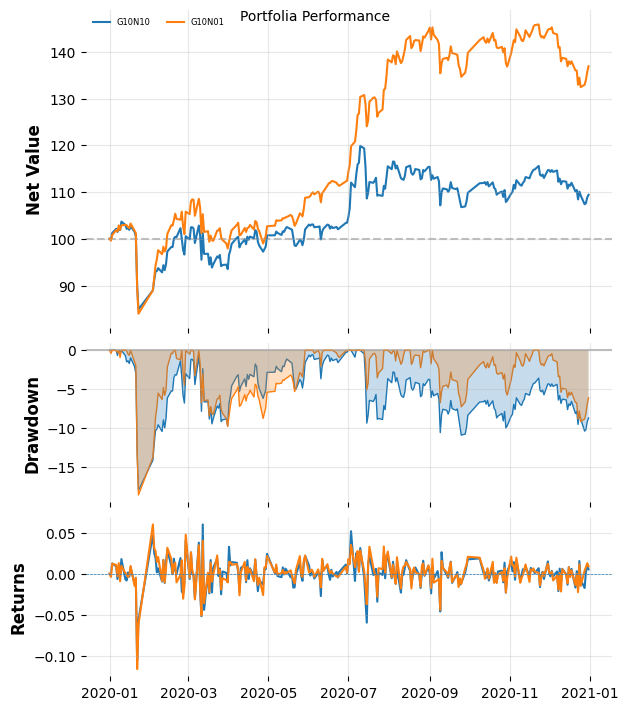

In [413]:
from nebular_xplorer.plots import snapshot
fig = snapshot(return_table)

In [ ]:
monthly_return = return_table.resample('ME').apply(lambda x: (1+x).prod()-1)
monthly_return["Year"] = monthly_return.index.year
monthly_return["Month"] = monthly_return.index.month
pivot_returns = monthly_return.pivot(index="Year", columns="Month", values=col)
# sns.heatmap(pivot_returns, annot=True, fmt=".2f",
#         linewidths=0.5, annot_kws={"size": 8, "ha": 'center', "va": 'bottom'}, ax=axes[3])

In [416]:
html = HtmlTpl()
html.addTable(getPortStat(return_table).iloc[:,:3], '{{table1}}')
html.addTable(getPortStat(return_table).iloc[:,:3], '{{table2}}')

returns = return_table
from nebular_xplorer.plots import snapshot, groupNav
import io
fig = groupNav(return_table_)
buf = io.BytesIO()
plt.savefig(buf, format='png', dpi=300)
plt.close()

buf.seek(0)

html.addFigure(buf, '{{fig2}}')
html.addElement('lujx', "{{author}}")
html.addElement('Alpha','{{title}}')
fig = snapshot(return_table)
buf = io.BytesIO()
plt.savefig(buf, format='png', dpi=300)
buf.seek(0)
html.addFigure(buf, '{{fig1}}')
html.save('report.html')
plt.close()


<Figure size 640x480 with 0 Axes>